# Heart-disease-Prediction-using-Machine-Learning-Algorithms

In [2]:
#Here I have imported all the essentil libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("ggplot")

In [3]:
#here I input the dataset folder
df = pd.read_csv("C:/Users/Abhishek Nagrecha/Desktop/input/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()
print( "The shape of the data is:",df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB
The shape of the data is: (303, 14)


In [5]:
#To display how many patients have got a heart disease
df.target.value_counts()
# df.sex.value_counts()

1    165
0    138
Name: target, dtype: int64

# Dataset Exploration for better understanding

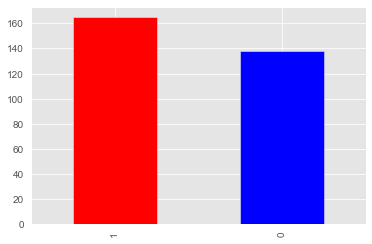

In [6]:
df.target.value_counts().plot(kind="bar", color=["red", "blue"])


In [7]:
# Checking for the missing values in the dataset
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:

categorical_val = []
continuous_val = []
for column in df.columns:
    print('-------------------------')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continuous_val.append(column)

-------------------------
age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
-------------------------
sex : [1 0]
-------------------------
cp : [3 2 1 0]
-------------------------
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
-------------------------
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 18

In [9]:
print(categorical_val)


['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


In [10]:
print(continuous_val)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


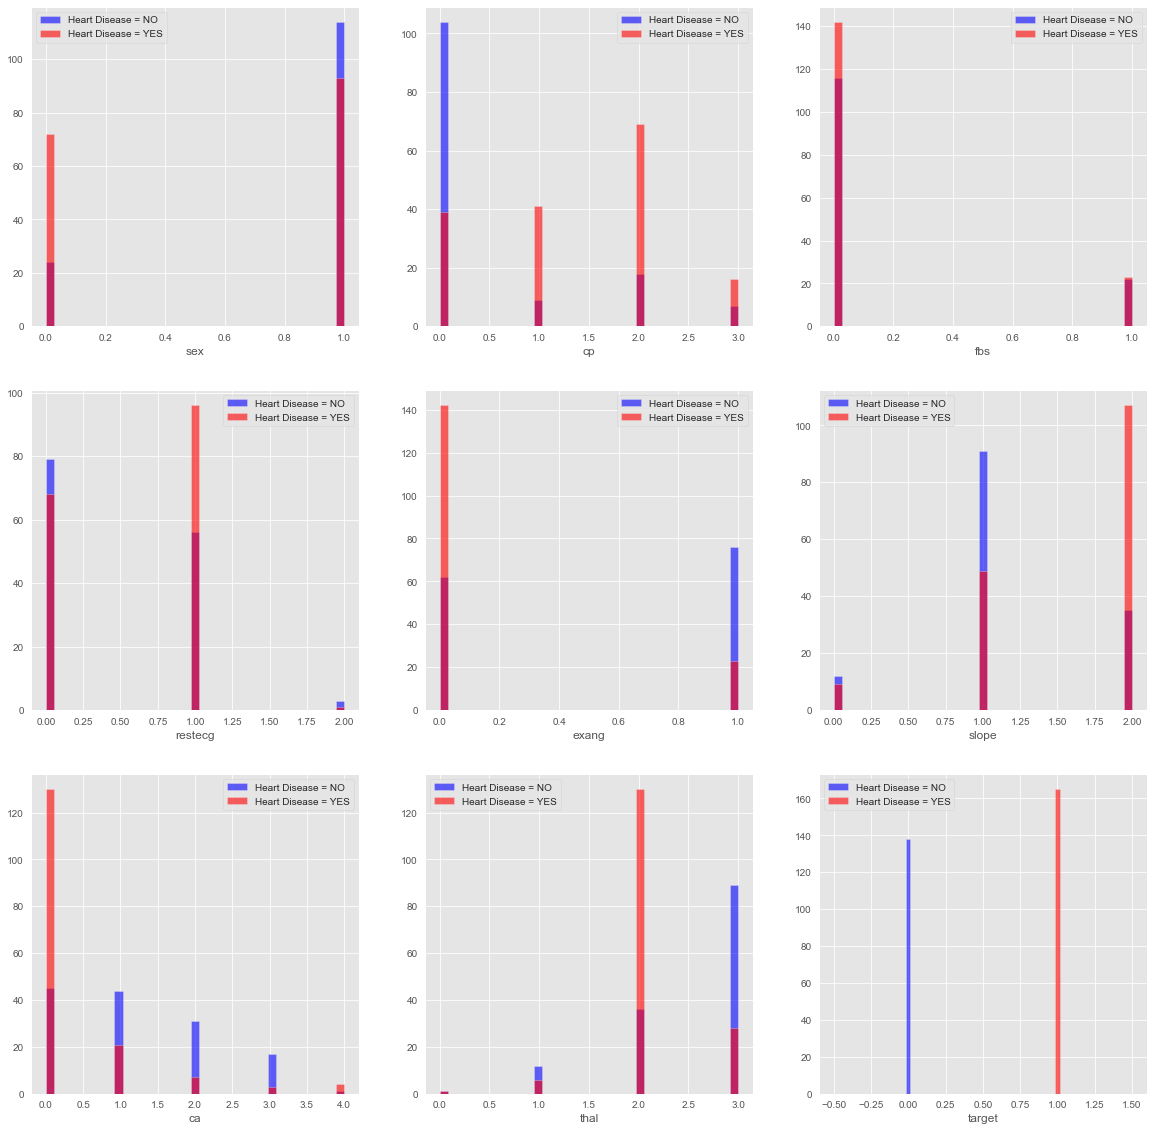

In [11]:
#Here I have shown visually the categorical features in corelation with having a heart_disease
plt.figure(figsize=(20, 20))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

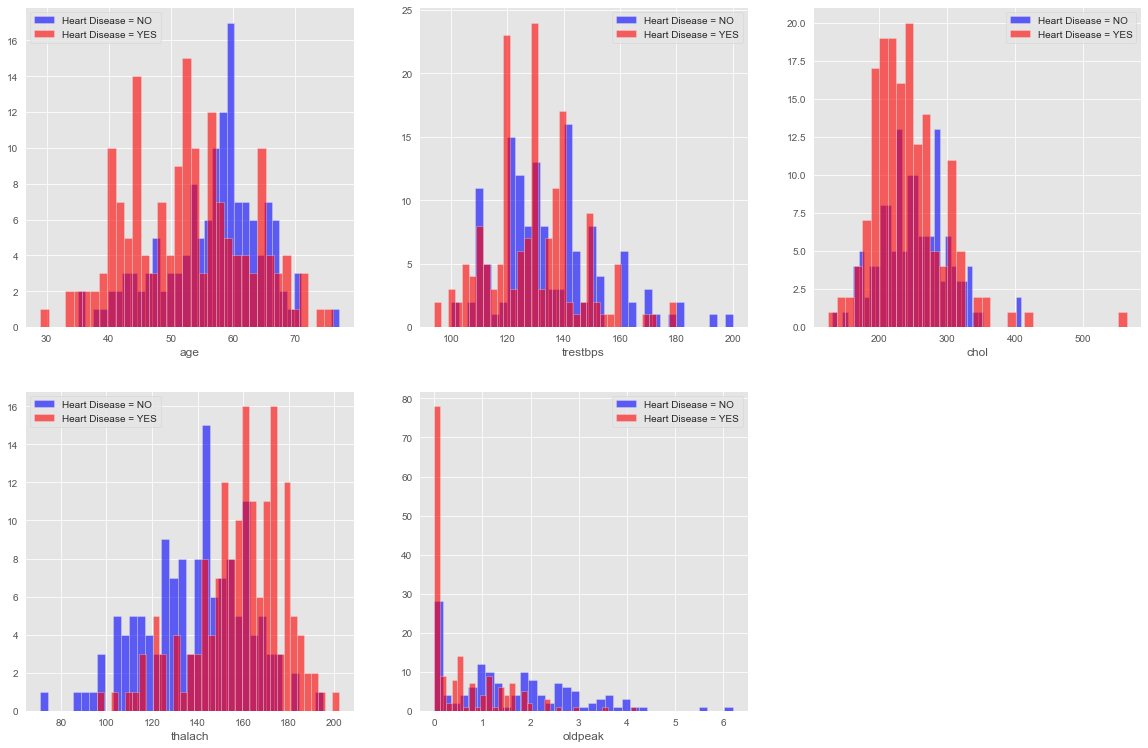

In [12]:
#Here I have shown visually the continuous features in corelation with having a heart_disease
plt.figure(figsize=(20, 20))

for i, column in enumerate(continuous_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

# Data Pre-processing

In [13]:
# After exploring the dataset, I observed that I need to convert some
# categorical variables into dummy variables and scale all the values
categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [14]:
print(df.columns)
print(dataset.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')


In [15]:
from sklearn.preprocessing import MinMaxScaler

m_sc = MinMaxScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = m_sc.fit_transform(dataset[col_to_scale])
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0.166667,0.339623,0.283105,0.885496,0.564516,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0.250000,0.339623,0.178082,0.770992,0.225806,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.562500,0.245283,0.251142,0.816794,0.129032,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.583333,0.245283,0.520548,0.702290,0.096774,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


# Applying machine learning algorithms

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) :.2f}")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) :.2f}")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) :.2f}")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) :.2f}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) :.2f}")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) :.2f}")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) :.2f}")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) :.2f}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [38]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression


In [39]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='sag')
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
print_score(log_reg, X_train, y_train, X_test, y_test, train=True)
print_score(log_reg, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 0.87
_______________________________________________
Classification Report:	Precision Score: 0.87
			Recall Score: 0.89
			F1 score: 0.88
_______________________________________________
Confusion Matrix: 
 [[ 91  18]
 [ 14 119]]

Test Result:
Accuracy Score: 0.85
_______________________________________________
Classification Report:	Precision Score: 0.87
			Recall Score: 0.84
			F1 score: 0.86
_______________________________________________
Confusion Matrix: 
 [[25  4]
 [ 5 27]]



In [41]:
test_score = accuracy_score(y_test, log_reg.predict(X_test)) 
train_score = accuracy_score(y_train, log_reg.predict(X_train)) 

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Machine Learning Model', 'Train Accuracy', 'Test Accuracy'])
results_df

,Machine Learning Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.867769,0.852459


#  K-nearest neighbors

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

print_score(knn_classifier, X_train, y_train, X_test, y_test, train=True)
print_score(knn_classifier, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 0.90
_______________________________________________
Classification Report:	Precision Score: 0.89
			Recall Score: 0.92
			F1 score: 0.91
_______________________________________________
Confusion Matrix: 
 [[ 94  15]
 [ 10 123]]

Test Result:
Accuracy Score: 0.87
_______________________________________________
Classification Report:	Precision Score: 0.88
			Recall Score: 0.88
			F1 score: 0.88
_______________________________________________
Confusion Matrix: 
 [[25  4]
 [ 4 28]]



In [51]:
test_score = accuracy_score(y_test, knn_classifier.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_classifier.predict(X_train)) * 100
results_df = pd.DataFrame(data=[["K Nearest Neighbor", train_score, test_score]], 
                          columns=['Machine Learning Model', 'Train Accuracy', 'Test Accuracy'])
results_df

,Machine Learning Model,Train Accuracy,Test Accuracy
0,K Nearest Neighbor,89.669421,86.885246


# Support Vector Machine

In [55]:
from sklearn.svm import SVC


svm_model = SVC(kernel='poly', gamma=0.1, C=1.0)
svm_model.fit(X_train, y_train)
print_score(svm_model, X_train, y_train, X_test, y_test, train=True)
print_score(svm_model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 0.90
_______________________________________________
Classification Report:	Precision Score: 0.91
			Recall Score: 0.92
			F1 score: 0.91
_______________________________________________
Confusion Matrix: 
 [[ 97  12]
 [ 11 122]]

Test Result:
Accuracy Score: 0.87
_______________________________________________
Classification Report:	Precision Score: 0.88
			Recall Score: 0.88
			F1 score: 0.88
_______________________________________________
Confusion Matrix: 
 [[25  4]
 [ 4 28]]



In [57]:
test_score = accuracy_score(y_test, svm_model.predict(X_test)) 
train_score = accuracy_score(y_train, svm_model.predict(X_train)) 

results_df = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Machine Learning Model', 'Train Accuracy', 'Test Accuracy'])
results_df

,Machine Learning Model,Train Accuracy,Test Accuracy
0,Support Vector Machine,0.904959,0.868852


# Hyperparameter Tuning to get better performances